In [2]:
def average(v):   
    ave = 0
    for i in range(len(v)):
        ave += v[i]
    return (ave/len(v))

def var(v):
    t = []
    av = average(v)
    for i in range(len(v)):
        t.append((v[i]-av)**2)
    return average(t)

def emittance(y,yprime,vx):
    t=[]
    c = 300000
    avy=average(y)
    avyprime=average(yprime)
    for i in range(len(y)):
        t.append((y[i]-avy)*(yprime[i]-avyprime))
    beta = average(vx)/c
    gamma = 1/(1+beta**2)**0.5
    emittance = ((var(y)*var(yprime)-average(t)**2)**0.5)*1000
    n_emittance = beta*gamma*emittance
    return emittance, n_emittance
    

# Lebt entry 40,000 part

In [3]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import math
m = 1.67E-27
e = 1.6E-19
x = []
y = []
z = []
Az = []
El = []
KE = []
vx = []
vy = []
vz = []
with open('solenoid_fe1.csv', mode='r') as csv_file1:
    csv_reader1 = csv.reader (csv_file1, delimiter = ',')
    for row in csv_reader1:
        x.append(float(row[0].strip()))
        y.append(float(row[1].strip()))
        z.append(float(row[2].strip()))
        Az.append(2*math.pi/360.0*float(row[3].strip()))
        El.append(2*math.pi/360.0*float(row[4].strip()))
        KE.append(float(row[5].strip()))

v = 0        
        
for i in range(len(Az)):
    v = 0.001*math.sqrt(2*e*KE[i]/m)
    vx.append(v*math.cos(El[i])*math.cos(Az[i]))
    vy.append(v*math.sin(El[i])*math.cos(Az[i]))
    vz.append(-v*math.cos(El[i])*math.sin(Az[i]))
    
yprime = []
zprime = []
for i in range(len(Az)):
    yprime.append(math.atan(vy[i]/vx[i]))
    zprime.append(math.atan(vz[i]/vx[i]))
   
print('yemit',emittance(y,yprime,vx))
print('xemit',emittance(z,zprime,vx))

yemit (2.6390549076468206, 0.020928445394317027)
xemit (2.6263199062075047, 0.020827453262077945)


No handles with labels found to put in legend.


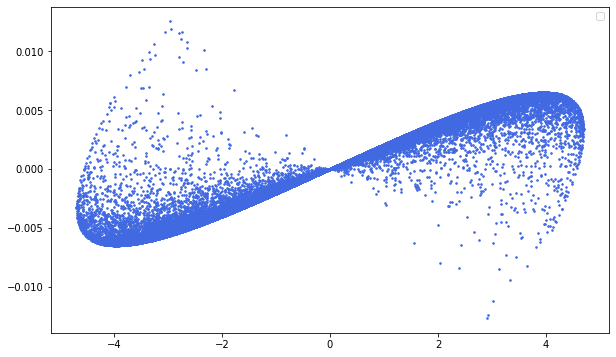

In [36]:
fig1 = plt.figure(figsize=(10,6))
ax1 = plt.axes(autoscale_on=True)
ax1.scatter(y,yprime,c='royalblue',s=10,marker='.')

ax1.yaxis.grid(True)
ax1.grid(False)
ax1.legend()
plt.show()
fig1.savefig('tracespace_entry_y.svg')    

No handles with labels found to put in legend.


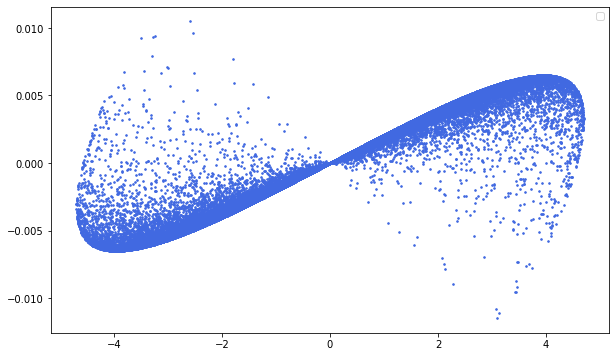

In [2]:
fig2 = plt.figure(figsize=(10,6))
ax2 = plt.axes(autoscale_on=True)
ax2.scatter(z,zprime,c='royalblue',s=10,marker='.')

ax2.yaxis.grid(True)
ax2.grid(False)
ax2.legend()
plt.show()
fig2.savefig('tracespace_entry_z.svg')    

No handles with labels found to put in legend.


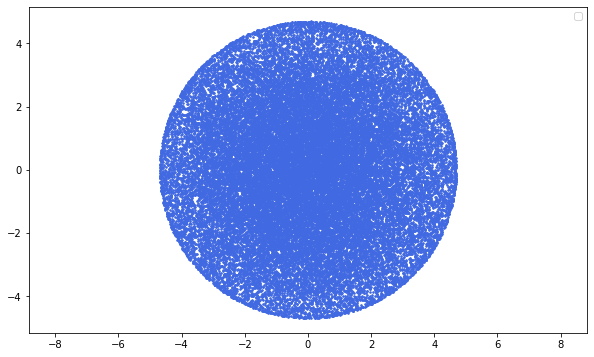

In [3]:
fig3 = plt.figure(figsize=(10,6))
ax3 = plt.axes(autoscale_on=True)
ax3.scatter(y,z,c='royalblue',s=10,marker='.')

ax3.yaxis.grid(True)
ax3.grid(False)
ax3.legend()
ax3.axis('equal')
plt.show()
fig3.savefig('radius_lebt_entry.svg')    

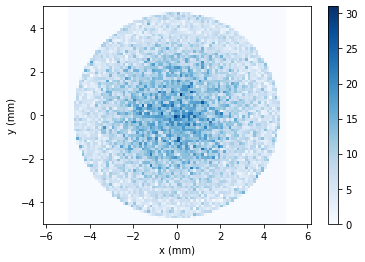

In [4]:
from scipy import stats
import numpy as np
#values = np.vstack([y, z])
#something = stats.gaussian_kde(values)
y = np.array(y)
z= np.array(z)
ax = plt.axes(autoscale_on=True)
nbins = 80
xi, yi = np.mgrid[y.min():y.max():nbins*1j, z.min():z.max():nbins*1j]
#zi = something(np.vstack([xi.flatten(), yi.flatten()]))
plt.hist2d(y,z,nbins,range = [[-5,5],[-5,5]],cmap = 'Blues')
#plt.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='auto',cmap='Blues')
plt.colorbar()
plt.xlim([-5,5])
plt.xlabel('x (mm)')
plt.ylabel("y (mm)")
plt.axis('equal')
plt.savefig('hist_radius_lebt_entry.svg')


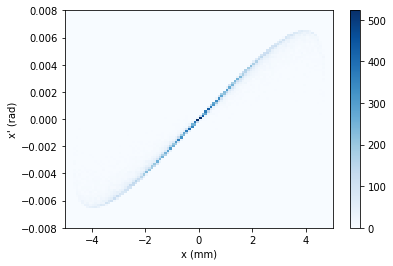

In [5]:
nbins=100
plt.hist2d(y,yprime,nbins,range = [[-5,5],[-0.008,0.008]],cmap = 'Blues')
plt.colorbar()
plt.xlabel('x (mm)')
plt.ylabel("x' (rad)")
plt.savefig('hist_tracespace_entry_y.svg')

Text(0, 0.5, "x' (rad)")

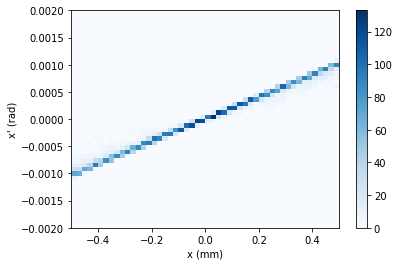

In [7]:
nbins=50
plt.hist2d(y,yprime,nbins,range = [[-0.5,0.5],[-0.002,0.002]],cmap = 'Blues')
plt.colorbar()
plt.xlabel('x (mm)')
plt.ylabel("x' (rad)")


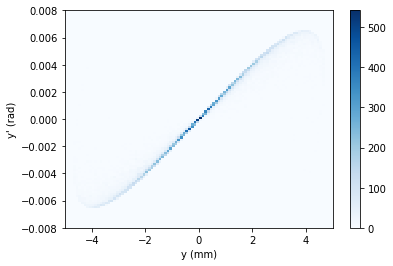

In [6]:
plt.hist2d(z,zprime,nbins,range = [[-5,5],[-0.008,0.008]],cmap = 'Blues')
plt.colorbar()
plt.xlabel('y (mm)')
plt.ylabel("y' (rad)")
plt.savefig('hist_tracespace_entry_z.svg')

# Subtracting the particles from the rim

In [141]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import math
m = 1.67E-27
e = 1.6E-19

radius = 0.1
emitt = []
n_emitt = []
radi = []
particles = []
for i in range(98):
    x2 = []
    y2 = []
    z2 = []
    Az2 = []
    El2 = []
    KE2 = []
    vx2 = []
    vy2 = []
    vz2 = []
    radi.append(radius)
    with open('solenoid_fe1.csv', mode='r') as csv_file1:
        csv_reader1 = csv.reader (csv_file1, delimiter = ',')
        for row in csv_reader1:
            if (float(row[1].strip())**2+float(row[2].strip())**2)<radius**2:
                x2.append(float(row[0].strip()))
                y2.append(float(row[1].strip()))
                z2.append(float(row[2].strip()))
                Az2.append(2*math.pi/360.0*float(row[3].strip()))
                El2.append(2*math.pi/360.0*float(row[4].strip()))
                KE2.append(float(row[5].strip()))
    v2 = 0        
    particles.append(len(x2)/396.11)
    for i in range(len(Az2)):
        v2 = 0.001*math.sqrt(2*e*KE[i]/m)
        vx2.append(v*math.cos(El2[i])*math.cos(Az2[i]))
        vy2.append(v*math.sin(El2[i])*math.cos(Az2[i]))
        vz2.append(-v*math.cos(El2[i])*math.sin(Az2[i]))
    yprime2 = []
    zprime2 = []
    for i in range(len(Az2)):
        yprime2.append(math.atan(vy2[i]/vx2[i]))
        zprime2.append(math.atan(vz2[i]/vx2[i]))
    emitt.append(emittance(y2,yprime2,vx2)[0])
    n_emitt.append(emittance(y2,yprime2,vx2)[1])
    radius = radius+0.05
    

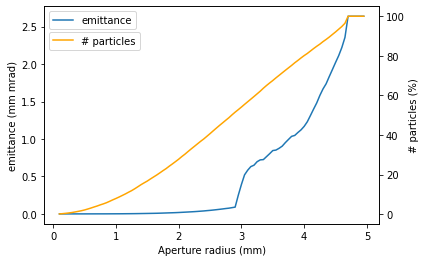

In [164]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(radi,emitt,label = 'emittance')
ax2.plot(radi,particles,color = 'orange',label='# particles')
ax1.set_xlabel('Aperture radius (mm)')
ax1.set_ylabel('emittance (mm mrad)')
ax2.set_ylabel('# particles (%)')
ax1.legend()
ax2.legend(loc=(0.015,0.8))
plt.savefig('emittance_variation_aperture.svg')

(-5.0, 5.0, -5.0, 5.0)

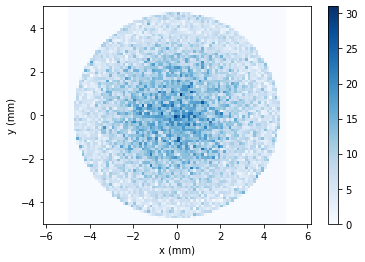

In [88]:
from scipy import stats
import numpy as np


ax = plt.axes(autoscale_on=True)
nbins = 80
plt.hist2d(y2,z2,nbins,range = [[-5,5],[-5,5]],cmap = 'Blues')
plt.colorbar()
plt.xlim([-5,5])
plt.xlabel('x (mm)')
plt.ylabel("y (mm)")
plt.axis('equal')

No handles with labels found to put in legend.


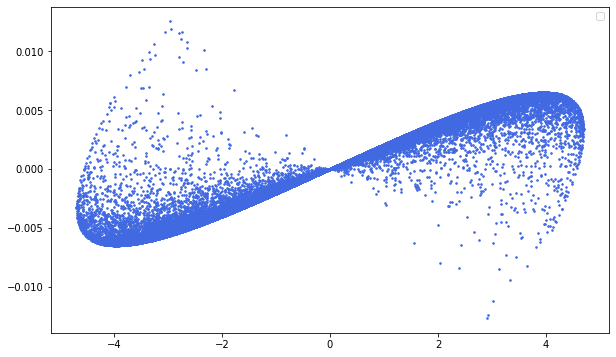

In [89]:
fig1 = plt.figure(figsize=(10,6))
ax1 = plt.axes(autoscale_on=True)
ax1.scatter(y2,yprime2,c='royalblue',s=10,marker='.')

ax1.yaxis.grid(True)
ax1.grid(False)
ax1.legend()
plt.show()

Text(0, 0.5, "y' (rad)")

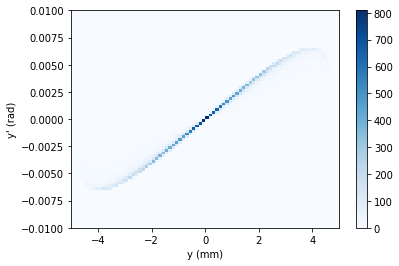

In [90]:
plt.hist2d(z2,zprime2,nbins,range = [[-5,5],[-0.01,0.01]],cmap = 'Blues')
plt.colorbar()
plt.xlabel('y (mm)')
plt.ylabel("y' (rad)")


# Lebt entry 10,000 part

In [118]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import math
m = 1.67E-27
e = 1.6E-19
x3 = []
y3 = []
z3 = []
Az3 = []
El3 = []
KE3 = []
vx3 = []
vy3 = []
vz3 = []
with open('solenoid_fe2.csv', mode='r') as csv_file1:
    csv_reader1 = csv.reader (csv_file1, delimiter = ',')
    for row in csv_reader1:
            x3.append(float(row[0].strip()))
            y3.append(float(row[1].strip()))
            z3.append(float(row[2].strip()))
            Az3.append(2*math.pi/360.0*float(row[3].strip()))
            El3.append(2*math.pi/360.0*float(row[4].strip()))
            KE3.append(float(row[5].strip()))
v = 0        
        
for i in range(len(Az3)):
    v = 0.001*math.sqrt(2*e*KE[i]/m)
    vx3.append(v*math.cos(El3[i])*math.cos(Az3[i]))
    vy3.append(v*math.sin(El3[i])*math.cos(Az3[i]))
    vz3.append(-v*math.cos(El3[i])*math.sin(Az3[i]))
    
yprime3 = []
zprime3 = []
for i in range(len(Az3)):
    yprime3.append(math.atan(vy3[i]/vx3[i]))
    zprime3.append(math.atan(vz3[i]/vx3[i]))
print('yemit',emittance(y3,yprime3,vx3))
print('xemit',emittance(z3,zprime3,vx3))

yemit (2.585364273279233, 0.020502522969585296)
xemit (2.525312042465885, 0.020026295207659955)


(-5.0, 5.0, -5.0, 5.0)

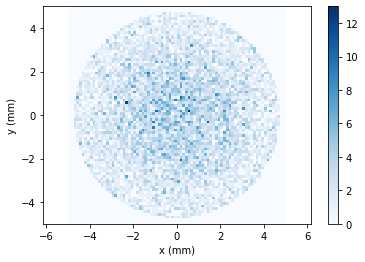

In [119]:
from scipy import stats
import numpy as np
ax = plt.axes(autoscale_on=True)
nbins = 80
plt.hist2d(y3,z3,nbins,range = [[-5,5],[-5,5]],cmap = 'Blues')
plt.colorbar()
plt.xlim([-5,5])
plt.xlabel('x (mm)')
plt.ylabel("y (mm)")
plt.axis('equal')

No handles with labels found to put in legend.


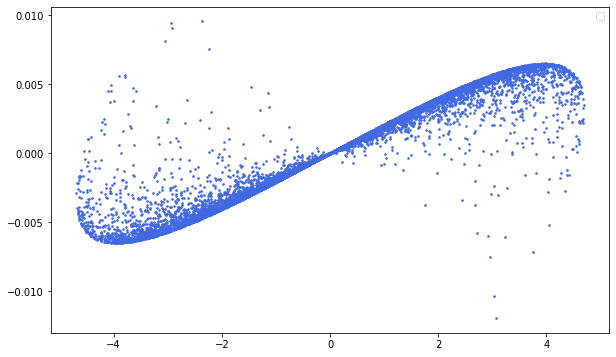

In [120]:
fig1 = plt.figure(figsize=(10,6))
ax1 = plt.axes(autoscale_on=True)
ax1.scatter(y3,yprime3,c='royalblue',s=10,marker='.')

ax1.yaxis.grid(True)
ax1.grid(False)
ax1.legend()
plt.show()

No handles with labels found to put in legend.


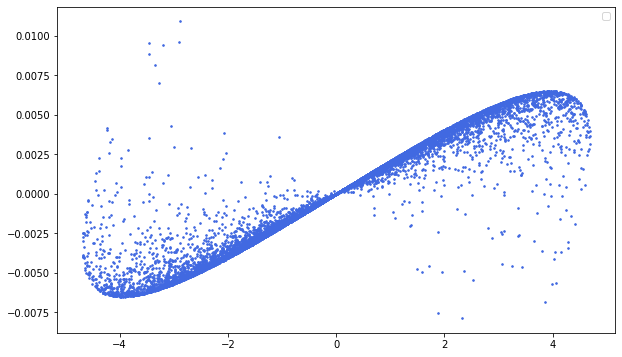

In [121]:
fig1 = plt.figure(figsize=(10,6))
ax1 = plt.axes(autoscale_on=True)
ax1.scatter(z3,zprime3,c='royalblue',s=10,marker='.')

ax1.yaxis.grid(True)
ax1.grid(False)
ax1.legend()
plt.show()